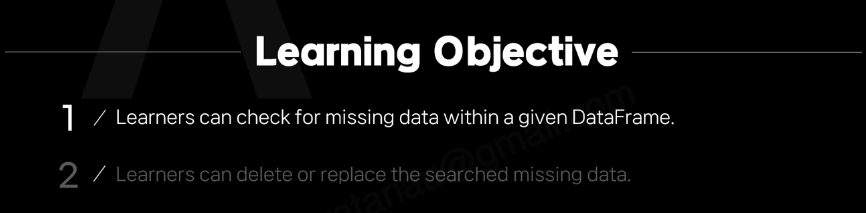

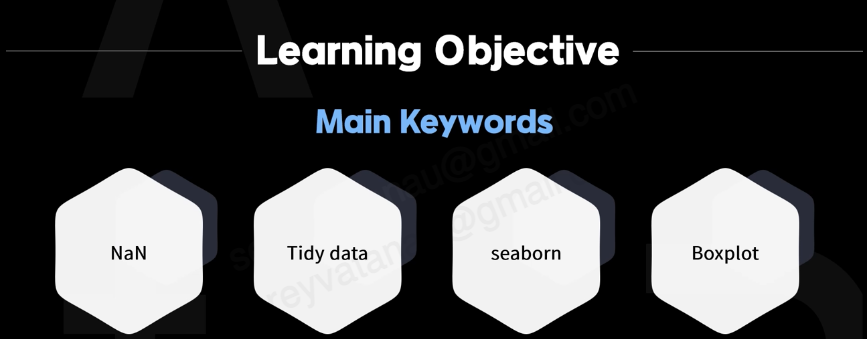

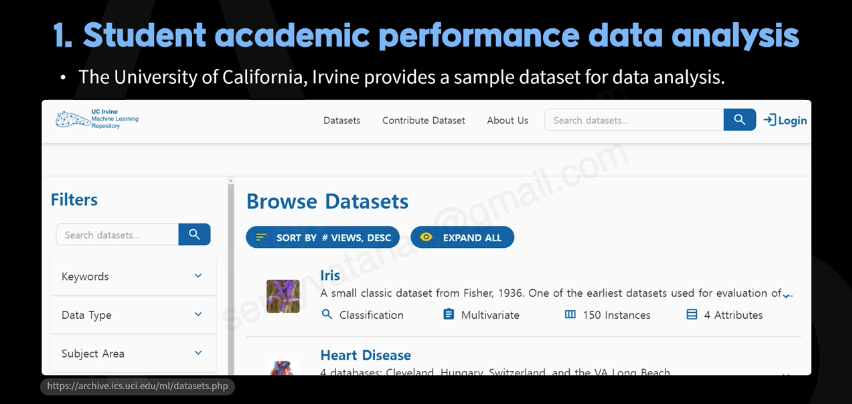

# [Student Performance](http://archive.ics.uci.edu/ml/datasets/student%2Bperformance)

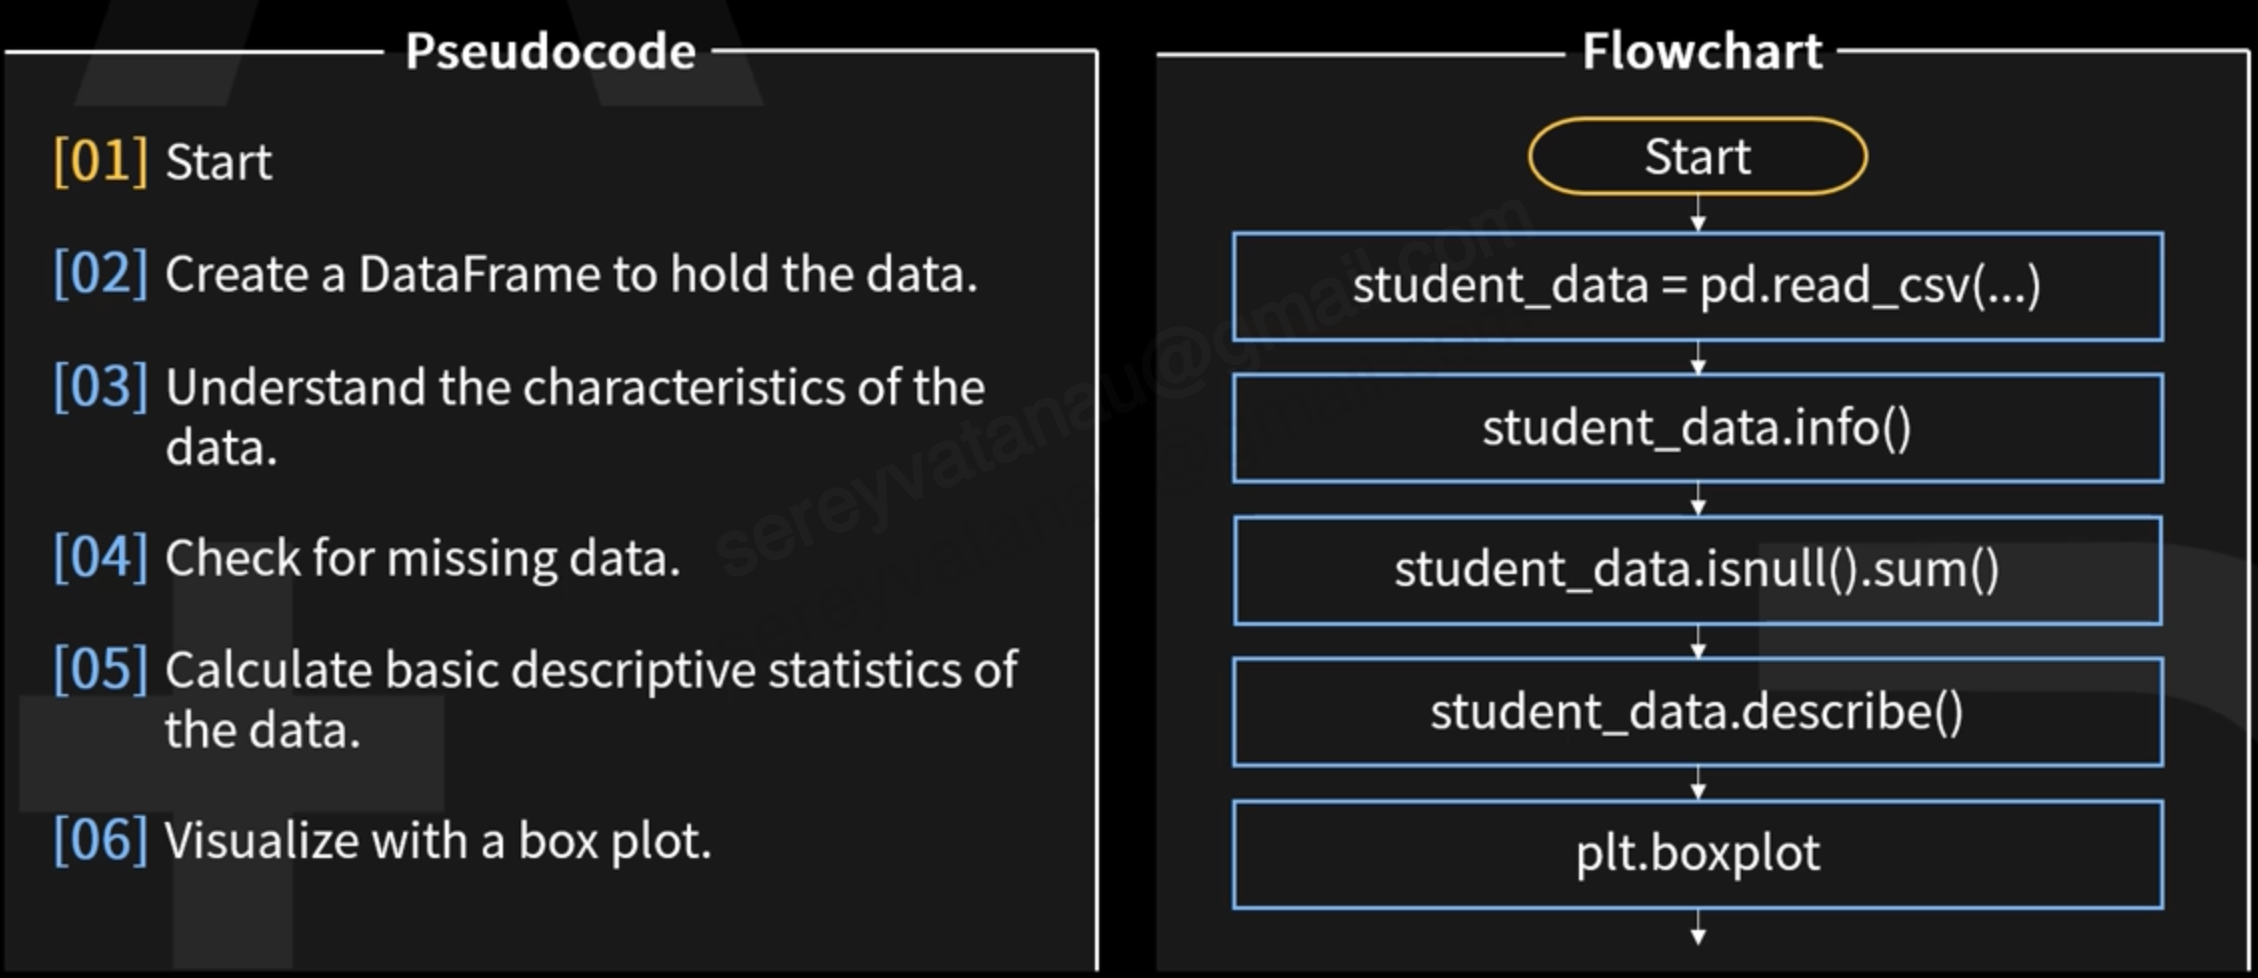

---

# <span style="color:red">Key Concept</span>

# 1. Why do we need to tidy data?

# [Tidy Data](https://vita.had.co.nz/papers/tidy-data.html)

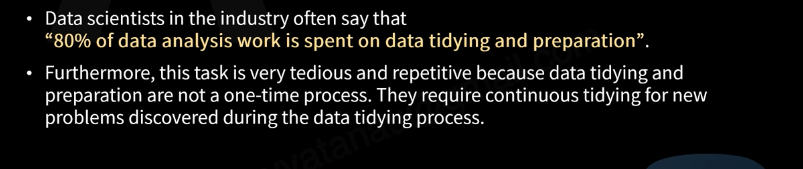

https://openscapes.org/blog/2020-10-12-tidy-data/

---

# 2. Definition of tidy data

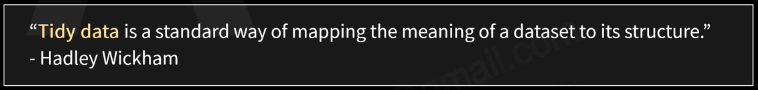

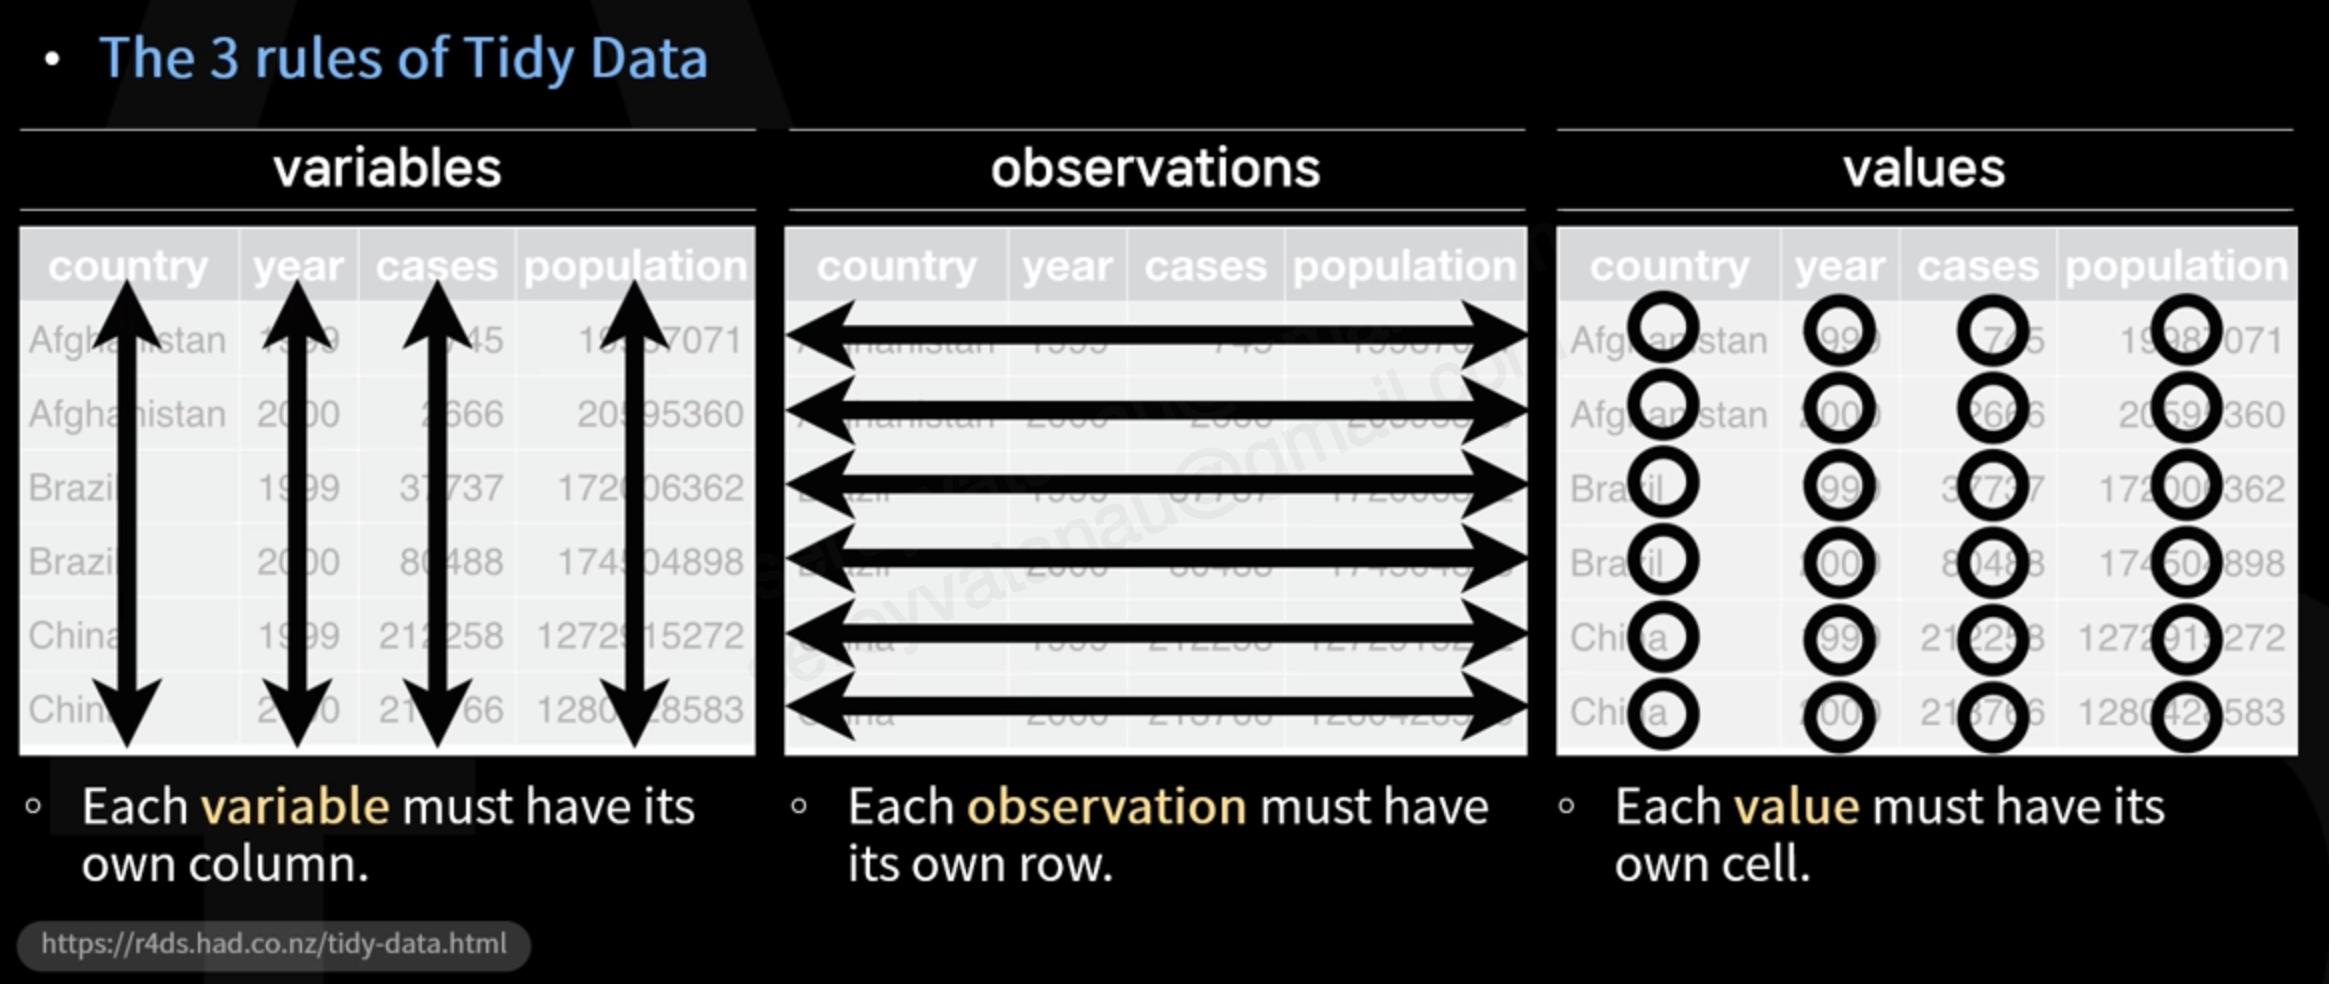

https://r4ds.had.co.nz/tidy-data.html

---

# 3. Situations where data tidying is necessary (Messy Data)

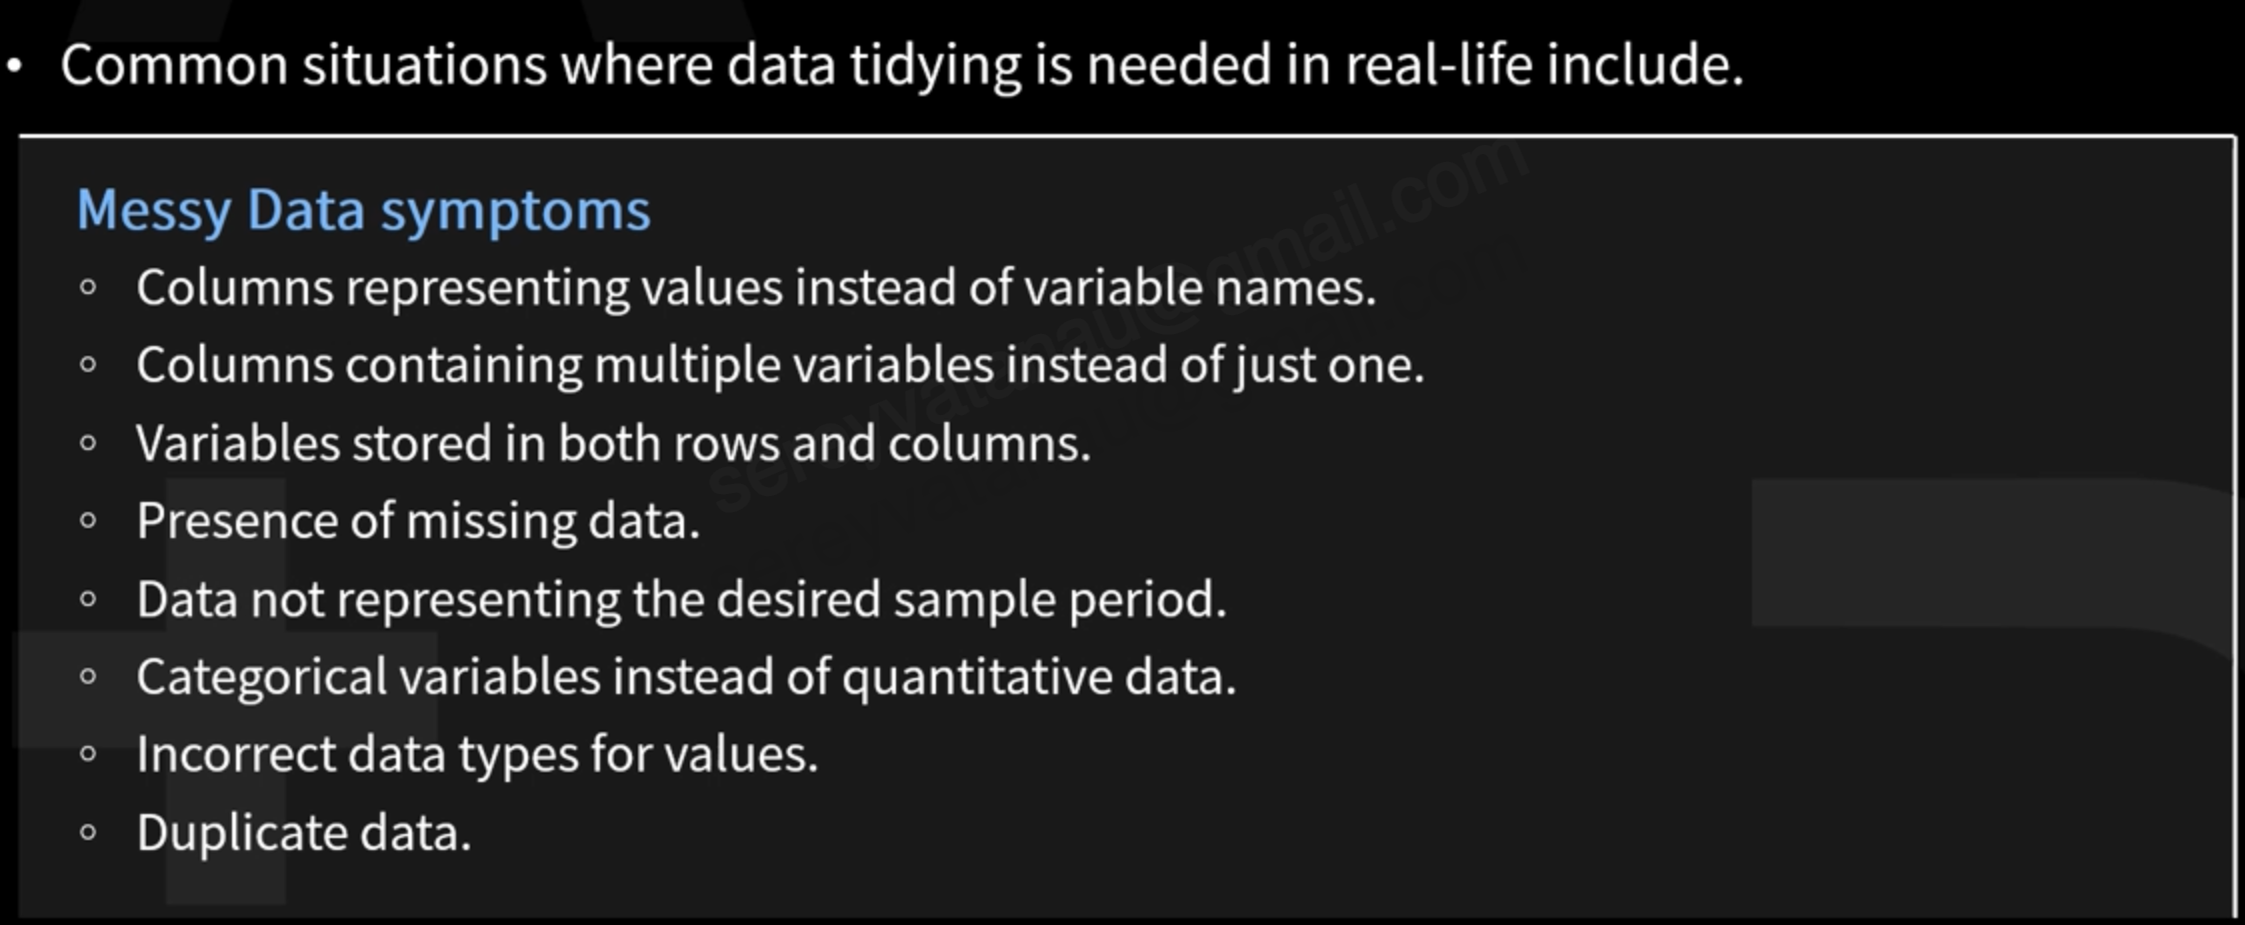

---

# 4. Preparing data for practice

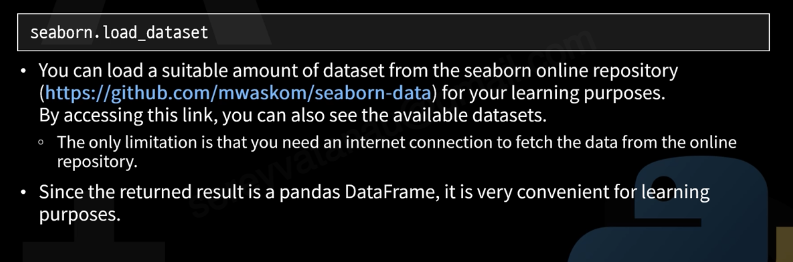

https://github.com/mwaskom/seaborn-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('titanic', cache = True)

In [2]:
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [4]:
df.shape

(891, 15)

---

# 5. Checking for missing data

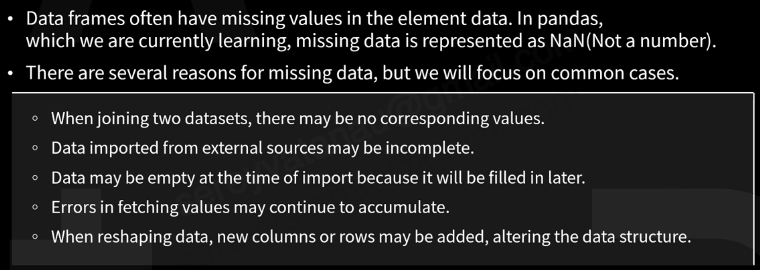

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df['age'].value_counts(dropna = False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: age, Length: 89, dtype: int64

In [7]:
df['deck'].value_counts(dropna = False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

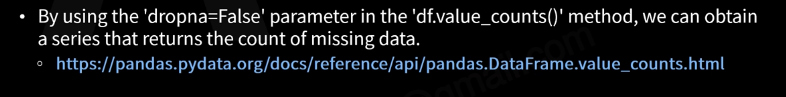

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

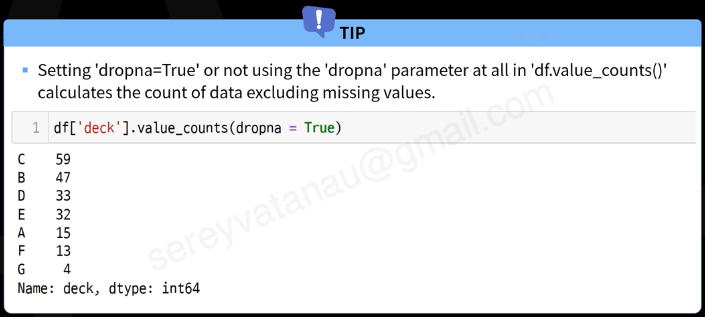

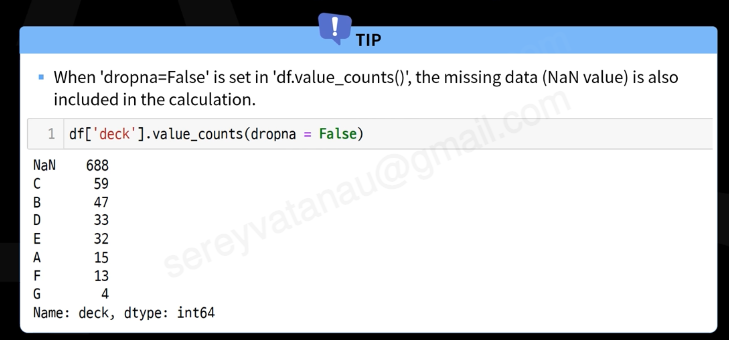

---

# 6. Finding missing data

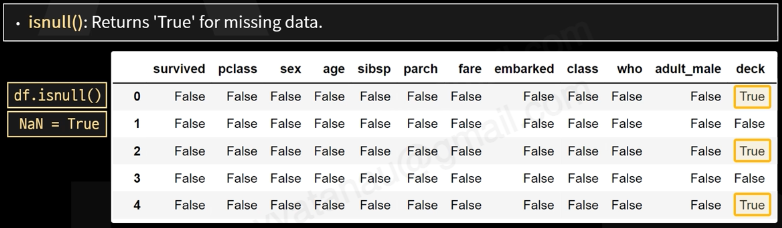

In [8]:
df.isnull()

survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  alive  alone  
0    False       False   True        False  False  False  
1    False       False  False        False  False  False  
2    False       False   True        False  False  False  
3    False       False  False        False  False  False  
4    False       False   True        False  False  False  
..     ...         ...    ...          ...    ...    ...  
886  False       False   True        False  False  False  
887  False       False  False        False  False  False  
888  False       False   True        False  False  False  
889  False       False  False        False  False  False  
890  False       False   True        False  False  False  

[891 rows x 15 columns]

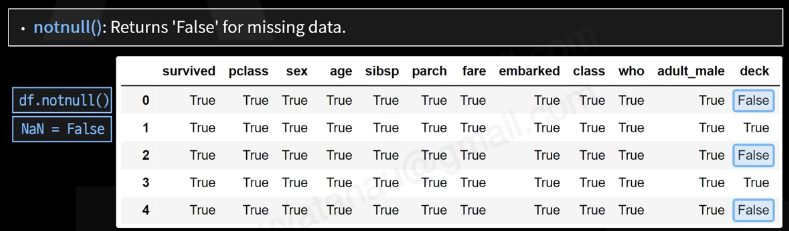

In [9]:
df.notnull()

survived  pclass   sex    age  sibsp  parch  fare  embarked  class   who  \
0        True    True  True   True   True   True  True      True   True  True   
1        True    True  True   True   True   True  True      True   True  True   
2        True    True  True   True   True   True  True      True   True  True   
3        True    True  True   True   True   True  True      True   True  True   
4        True    True  True   True   True   True  True      True   True  True   
..        ...     ...   ...    ...    ...    ...   ...       ...    ...   ...   
886      True    True  True   True   True   True  True      True   True  True   
887      True    True  True   True   True   True  True      True   True  True   
888      True    True  True  False   True   True  True      True   True  True   
889      True    True  True   True   True   True  True      True   True  True   
890      True    True  True   True   True   True  True      True   True  True   

     adult_male   deck  embark_town  alive  alone  
0          True  False         True   True   True  
1          True   True         True   True   True  
2          True  False         True   True   True  
3          True   True         True   True   True  
4          True  False         True   True   True  
..          ...    ...          ...    ...    ...  
886        True  False         True   True   True  
887        True   True         True   True   True  
888        True  False         True   True   True  
889        True   True         True   True   True  
890        True  False         True   True   True  

[891 rows x 15 columns]

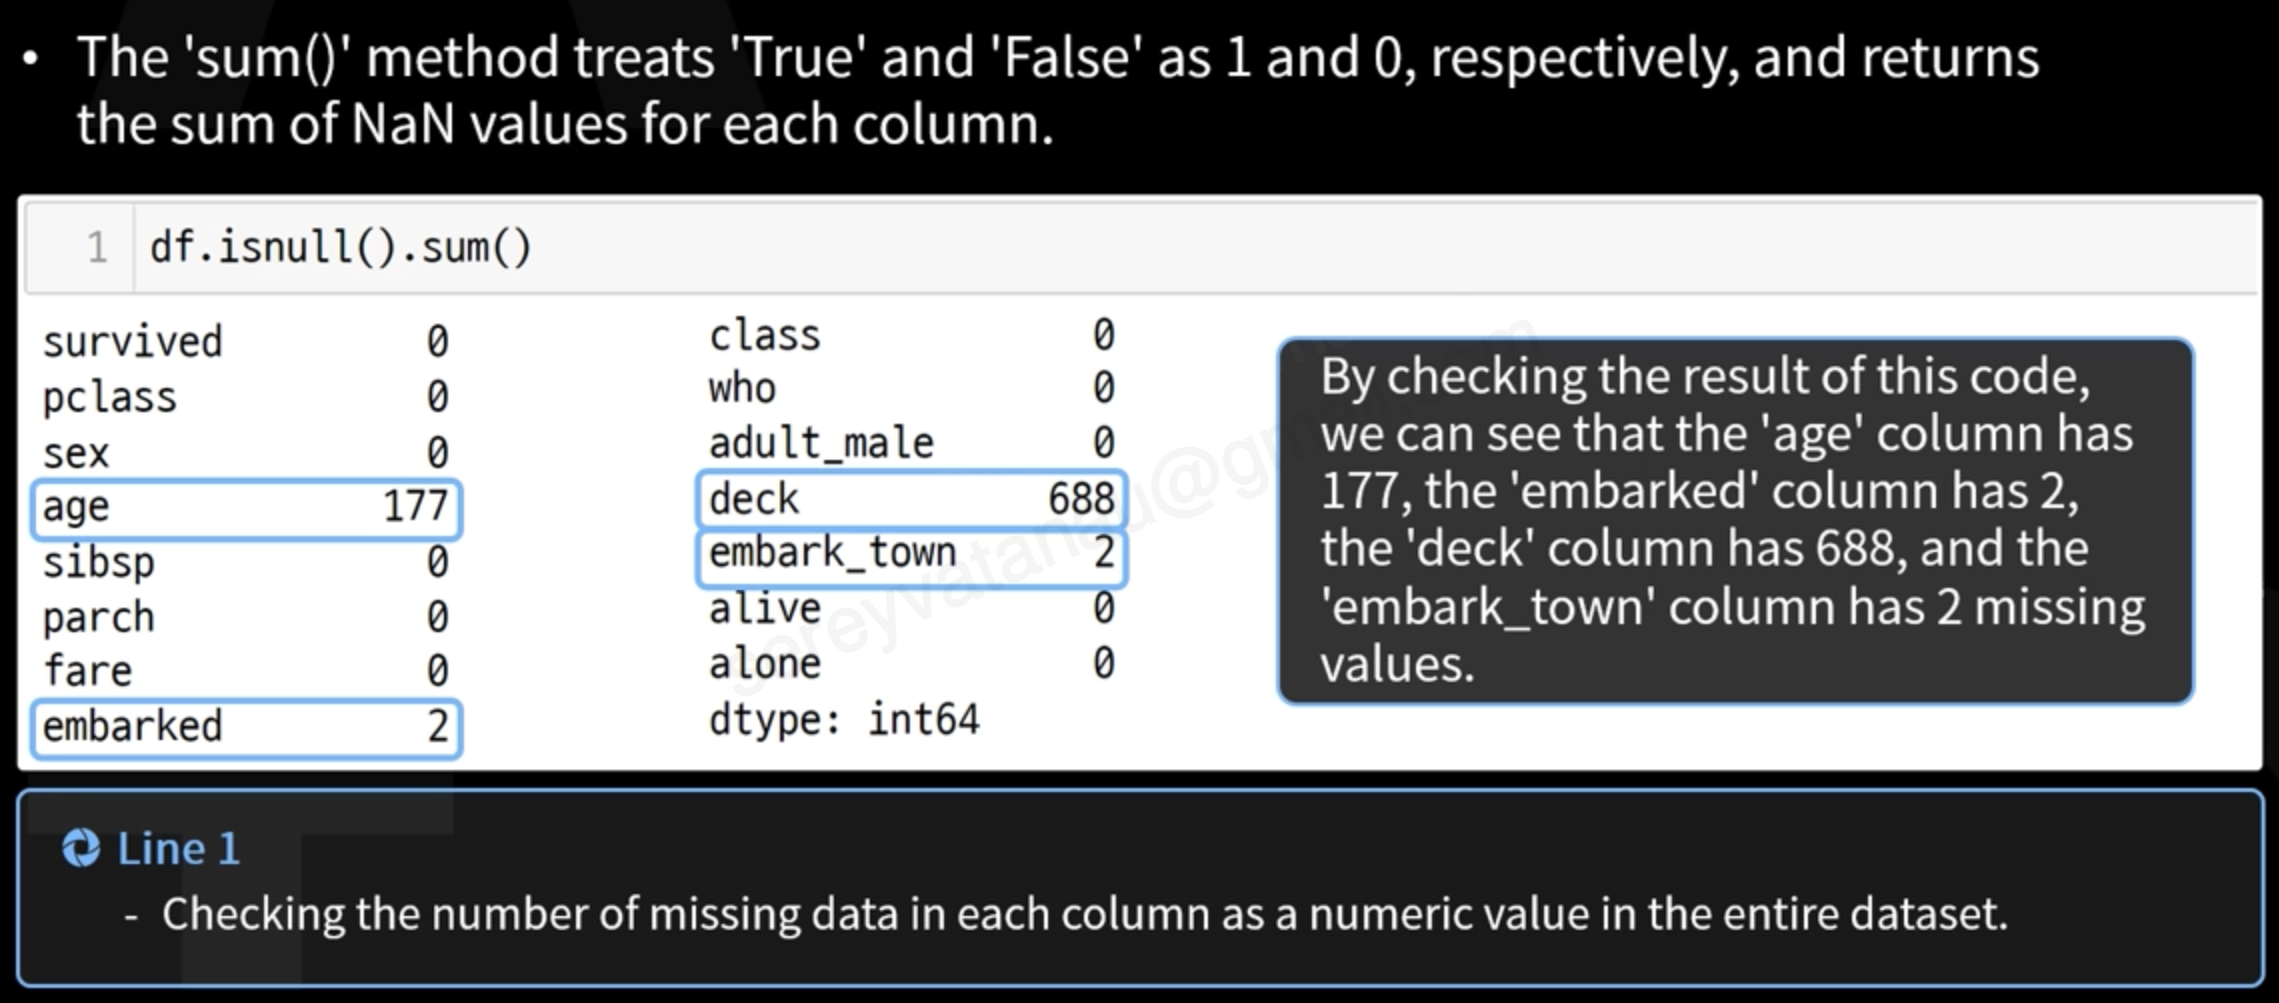

In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
df.isnull().sum().sum()

869

In [12]:
(len(df)-df.count()).sum()

869

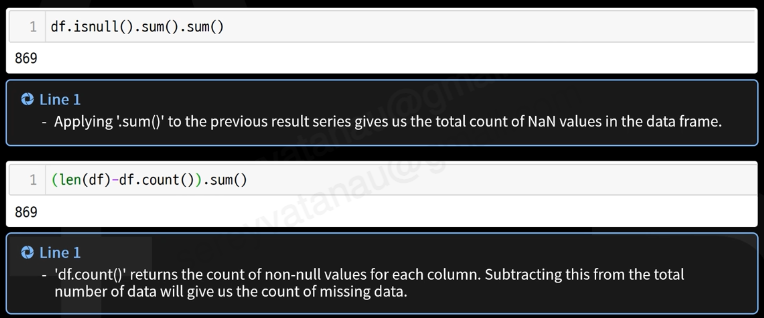

---

# 7. Deleting missing data

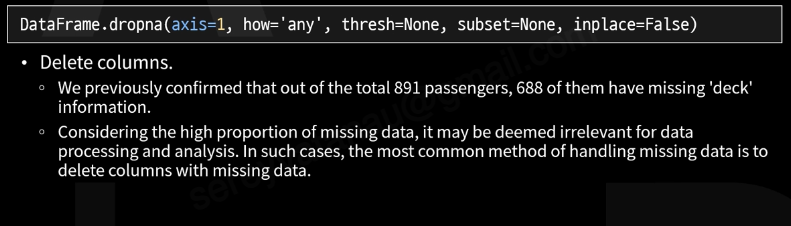

In [13]:
new_df = df.dropna(axis = 1, thresh = 500)

new_df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True

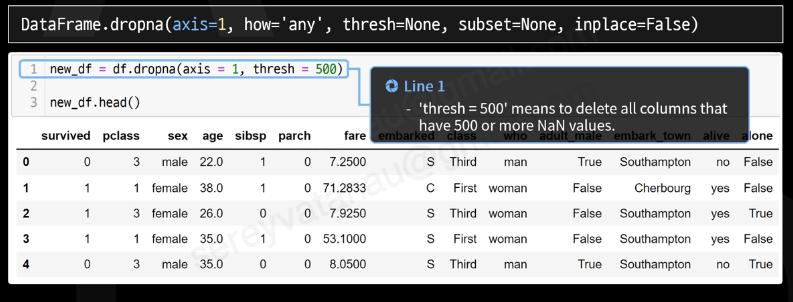

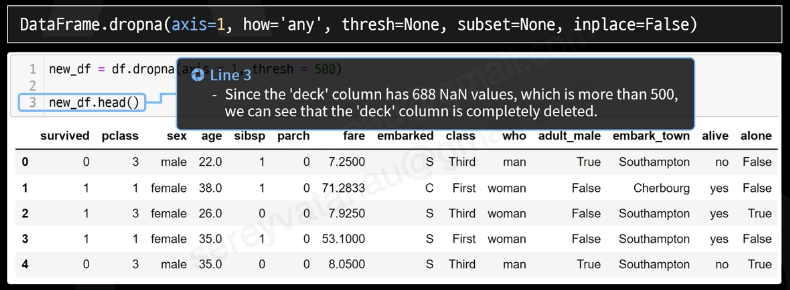

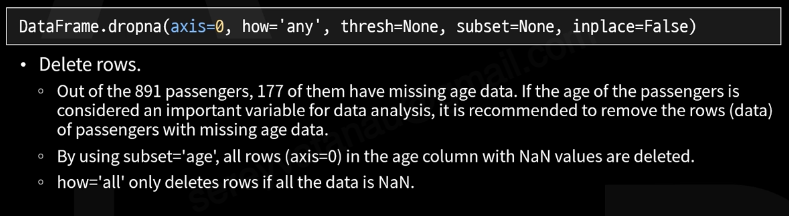

In [15]:
age_df = df.dropna(axis = 0, how = 'any', subset = ['age'])
len(age_df)

714

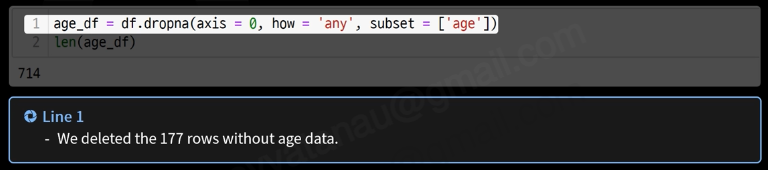

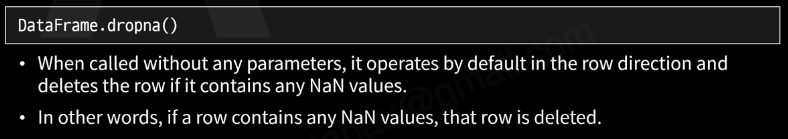

In [16]:
no = df.dropna()
no.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [17]:
len(no)

182

In [18]:
no = df.dropna(axis = 0, how = 'any')
len(no)

182

---

# 8. Replacing (substituting) missing data with other data

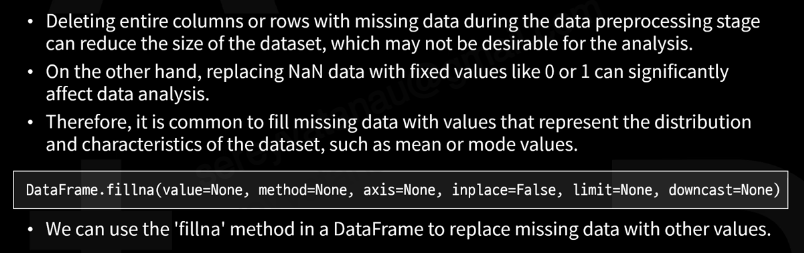

## 1. Replacing with the mean value

In [19]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic', cache = True)

df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [21]:
avg_age = df['age'].mean(axis = 0)
avg_age

29.69911764705882

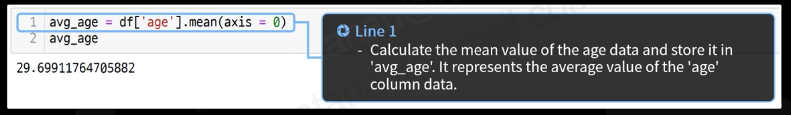

In [22]:
median_age = df['age'].median(axis = 0)
median_age

28.0

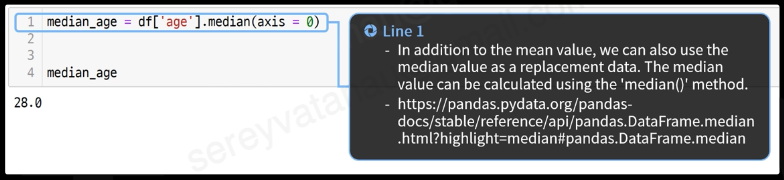

- Using the 'fillna( )' method, we can replace NaN data elements with the mean value. Let's use the reviously calculated 'avg-age' to replace them.

In [23]:
df['age'].fillna(avg_age, inplace = True)

- Alternatively, we can use the previously calculated 'median_age' to perform the replacement.

In [24]:
df['age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [25]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

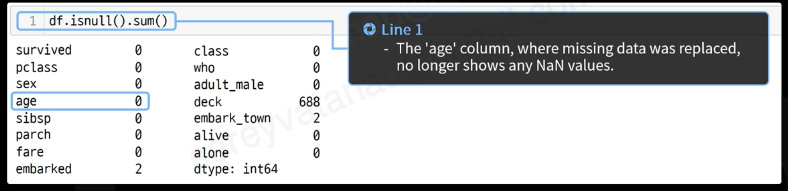

## 2. Replacing with the most frequent value

- Let's search for the most frequently boarded city name among passengers and replace the missing data in the 'embark_town' column with that data.

In [26]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic', cache = True)

In [27]:
town_count = df['embark_town'].value_counts(dropna = True)

town_count

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

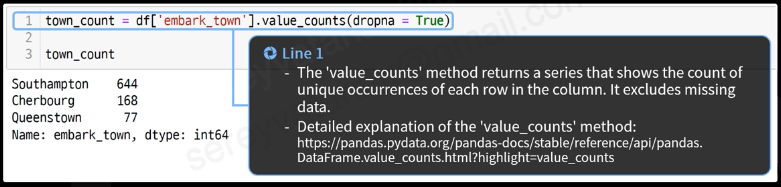

In [28]:
type(town_count)

pandas.core.series.Series

In [29]:
most = town_count.idxmax()

most

'Southampton'

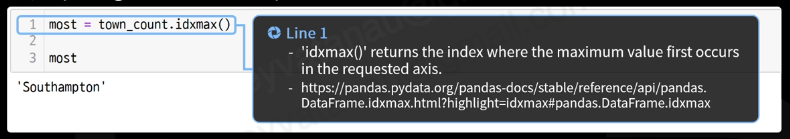

In [30]:
df['embark_town'].fillna(most, inplace = True)

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

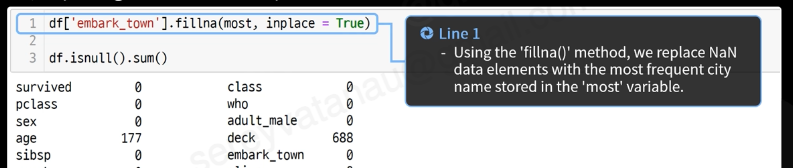

## 3. Replacing with neighboring values

- While not applicable to all data, other neighboring data in a dataset share similarities.

- After examining the characteristics of the dataset, we can replace missing data with the previous or next available data.

- In the 'fillna( )' method, the 'ffill' and 'bfill' options refer to 'forward fill' and 'backward fill', respectively.

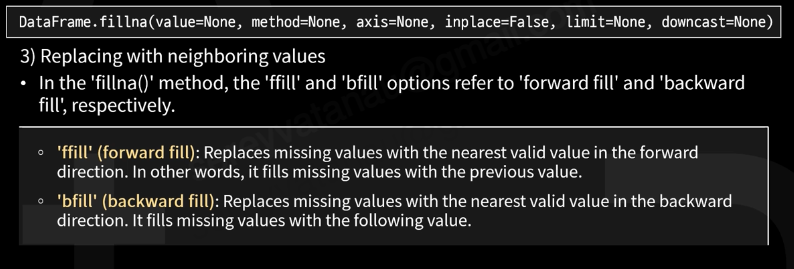

In [31]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic', cache = True)
null_indexes = df[df['embark_town'].isna()].index
null_indexes

Int64Index([61, 829], dtype='int64')

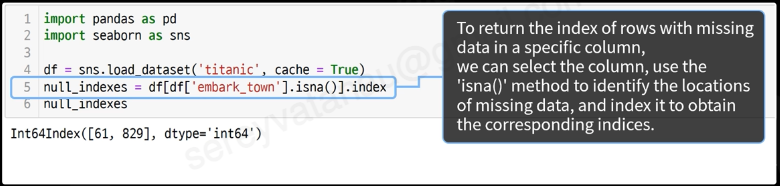

In [32]:
df[60 : 63]

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
60         0       3    male  22.0      0      0   7.2292        C  Third   
61         1       1  female  38.0      0      0  80.0000      NaN  First   
62         0       1    male  45.0      1      0  83.4750        S  First   

      who  adult_male deck  embark_town alive  alone  
60    man        True  NaN    Cherbourg    no   True  
61  woman       False    B          NaN   yes   True  
62    man        True    C  Southampton    no  False

In [34]:
df['embark_town'].fillna(method = 'ffill', inplace = True)
df[60 : 63]

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
60         0       3    male  22.0      0      0   7.2292        C  Third   
61         1       1  female  38.0      0      0  80.0000      NaN  First   
62         0       1    male  45.0      1      0  83.4750        S  First   

      who  adult_male deck  embark_town alive  alone  
60    man        True  NaN    Cherbourg    no   True  
61  woman       False    B    Cherbourg   yes   True  
62    man        True    C  Southampton    no  False

In [36]:
df = sns.load_dataset('titanic', cache = True)
df['embark_town'].fillna(method = 'bfill', inplace = True)
df[60 : 63]

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
60         0       3    male  22.0      0      0   7.2292        C  Third   
61         1       1  female  38.0      0      0  80.0000      NaN  First   
62         0       1    male  45.0      1      0  83.4750        S  First   

      who  adult_male deck  embark_town alive  alone  
60    man        True  NaN    Cherbourg    no   True  
61  woman       False    B  Southampton   yes   True  
62    man        True    C  Southampton    no  False

---

# <span style="color:red">Let's Code</span>

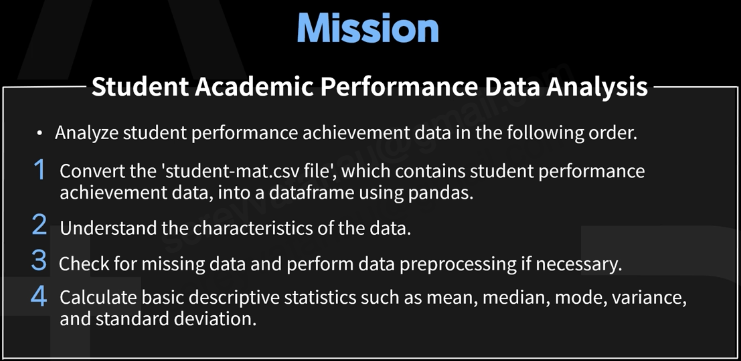

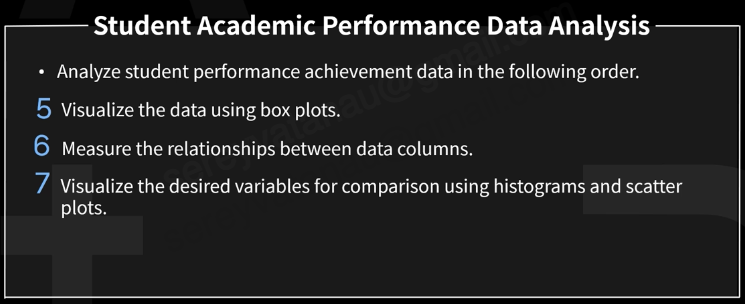

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

student_data = pd.read_csv('./data/student/student-mat.csv')
student_data.head()

school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
2  GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
3  GP;"F";15;"U";"GT3";"T";4;2;"health";"services...                                                                                                                                                                                 
4  GP;"F";16;"U";"GT3";"T";3;3;"other";"other";"h...

In [3]:
student_data = pd.read_csv('./data/student/student-mat.csv', sep = ';')
student_data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
student_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
student_data.isnull().sum().sum()

0

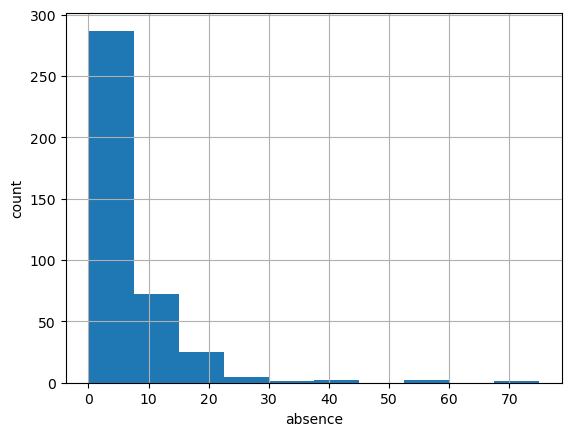

In [30]:
plt.hist(student_data['absences'])

plt.xlabel('absence')
plt.ylabel('count')

plt.grid(True)

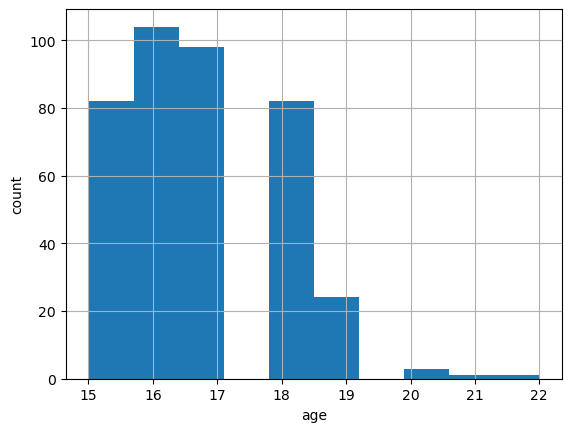

In [17]:
plt.hist(student_data['age'])

plt.xlabel('age')
plt.ylabel('count')

plt.grid(True)

In [18]:
student_data.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [19]:
student_data['studytime'].median()

2.0

In [20]:
student_data['studytime'].mode()

0    2
Name: studytime, dtype: int64

In [22]:
student_data['studytime'].var()

0.704324359056738

In [23]:
student_data['studytime'].std()

0.839240346418556

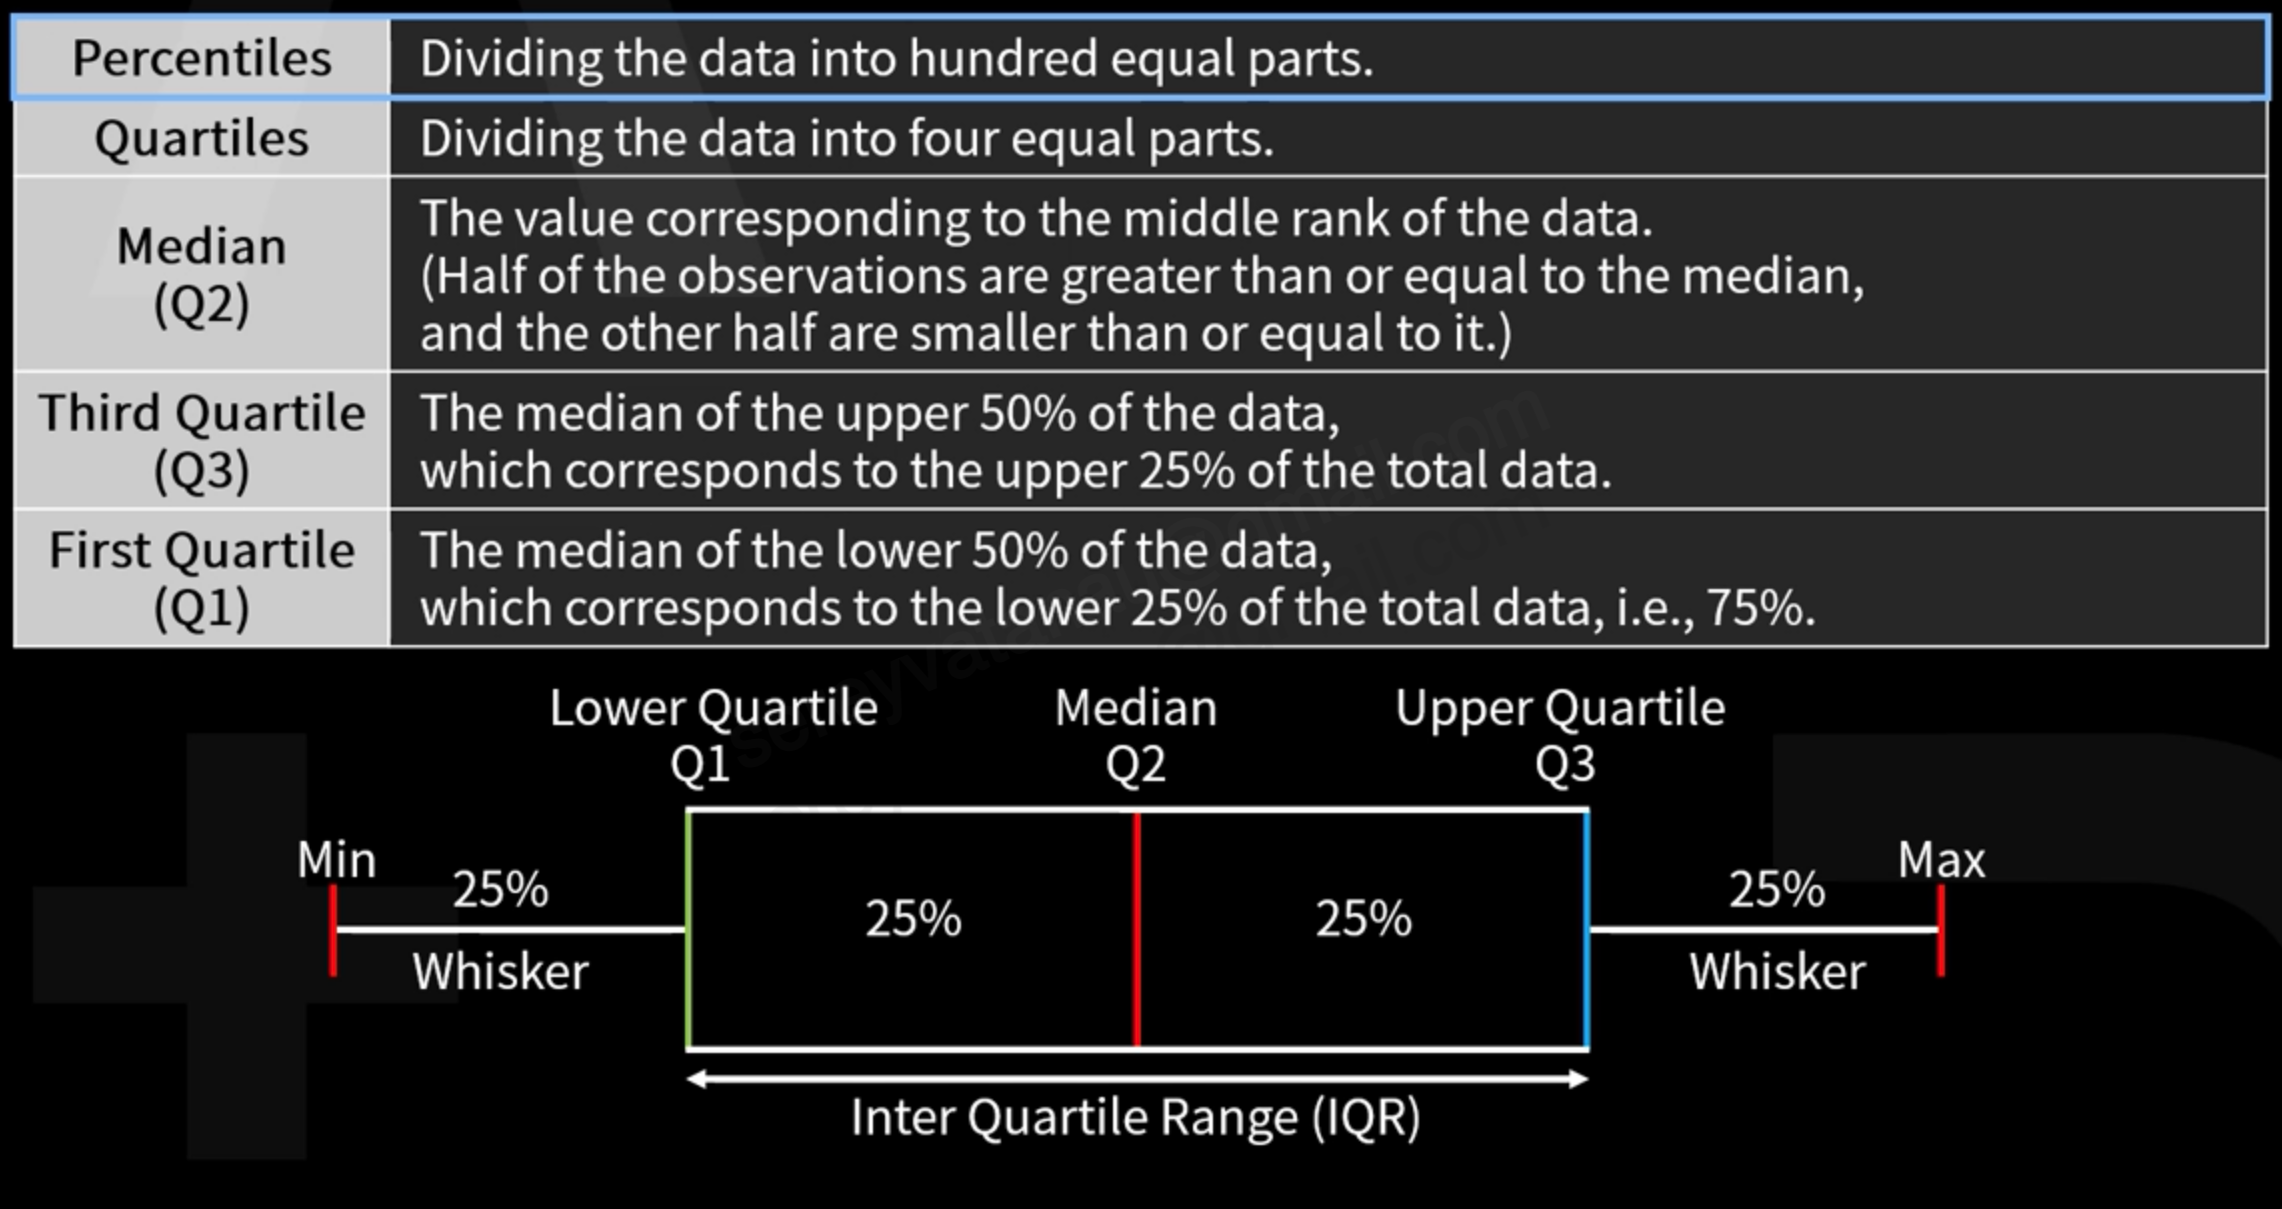

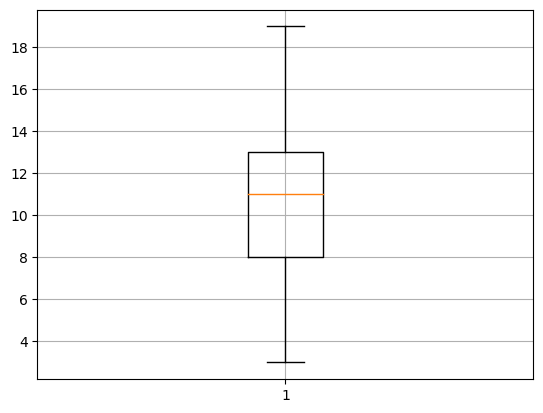

In [24]:
plt.boxplot(student_data['G1'])
plt.grid(True)

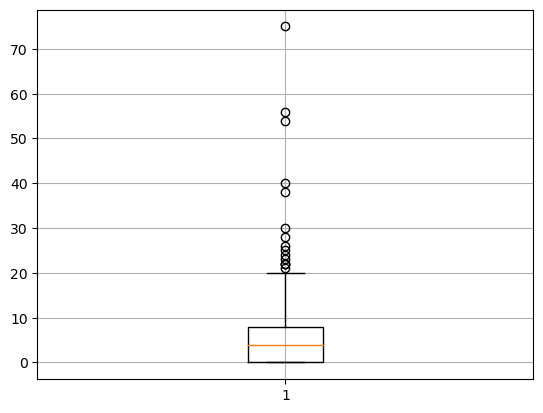

In [25]:
plt.boxplot(student_data['absences'])
plt.grid(True)

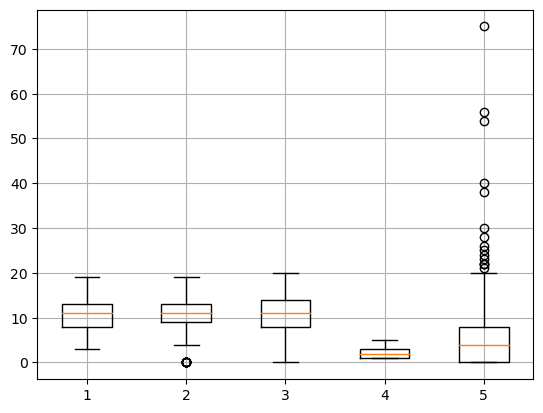

In [26]:
plt.boxplot([student_data['G1'], student_data['G2'], student_data['G3'], student_data['Walc'], student_data['absences']])
plt.grid(True)

In [27]:
study_time_cv = student_data['studytime'].std() /student_data['studytime'].mean()
print(study_time_cv)

0.412313354272798


In [28]:
absences_cv = student_data['absences'].std() / student_data['absences'].mean()
print(absences_cv)

1.4018726369879067


In [29]:
cv = student_data.std(numeric_only = True) / student_data.mean(numeric_only = True)
cv

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

In [31]:
student_data.cov(min_periods = None, ddof = 1, numeric_only = True)

age      Medu      Fedu  traveltime  studytime  failures  \
age         1.628285 -0.228619 -0.226949    0.062873  -0.004434  0.231221   
Medu       -0.228619  1.198445  0.742717   -0.131061   0.059667 -0.192681   
Fedu       -0.226949  0.742717  1.184180   -0.120073  -0.008379 -0.202641   
traveltime  0.062873 -0.131061 -0.120073    0.486513  -0.059070  0.047844   
studytime  -0.004434  0.059667 -0.008379   -0.059070   0.704324 -0.108321   
failures    0.231221 -0.192681 -0.202641    0.047844  -0.108321  0.553017   
famrel      0.061717 -0.003842 -0.001337   -0.010512   0.029898 -0.029564   
freetime    0.020947  0.033779 -0.013963   -0.011861  -0.120041  0.068329   
goout       0.180364  0.078115  0.052220    0.022162  -0.059706  0.103123   
Dalc        0.149039  0.019341  0.002313    0.085941  -0.146533  0.090118   
Walc        0.192733 -0.066440 -0.017702    0.120478  -0.274304  0.135964   
health     -0.110326 -0.071349  0.022303    0.007274  -0.088228  0.068059   
absences    1.789501  0.878622  0.213134   -0.072255  -0.421127  0.379265   
G1         -0.271413  0.746135  0.687245   -0.215402   0.447401 -0.875557   
G2         -0.688653  0.887509  0.674953   -0.401940   0.428947 -0.995528   
G3         -0.944612  1.089096  0.760078   -0.374337   0.376110 -1.227932   

              famrel  freetime     goout      Dalc      Walc    health  \
age         0.061717  0.020947  0.180364  0.149039  0.192733 -0.110326   
Medu       -0.003842  0.033779  0.078115  0.019341 -0.066440 -0.071349   
Fedu       -0.001337 -0.013963  0.052220  0.002313 -0.017702  0.022303   
traveltime -0.010512 -0.011861  0.022162  0.085941  0.120478  0.007274   
studytime   0.029898 -0.120041 -0.059706 -0.146533 -0.274304 -0.088228   
failures   -0.029564  0.068329  0.103123  0.090118  0.135964  0.068059   
famrel      0.803997  0.134974  0.064454 -0.061974 -0.130952  0.117252   
freetime    0.134974  0.997725  0.316944  0.185954  0.190163  0.105173   
goout       0.064454  0.316944  1.239388  0.264763  0.602744 -0.014824   
Dalc       -0.061974  0.185954  0.264763  0.793420  0.742852  0.095579   
Walc       -0.130952  0.190163  0.602744  0.742852  1.658678  0.165585   
health      0.117252  0.105173 -0.014824  0.095579  0.165585  1.932944   
absences   -0.318287 -0.464274  0.394718  0.797758  1.404774 -0.333098   
G1          0.065977  0.041817 -0.550967 -0.278385 -0.539388 -0.337666   
G2         -0.061659 -0.051764 -0.679438 -0.214836 -0.411425 -0.511039   
G3          0.211000  0.051745 -0.677292 -0.223061 -0.306464 -0.390677   

             absences         G1         G2         G3  
age          1.789501  -0.271413  -0.688653  -0.944612  
Medu         0.878622   0.746135   0.887509   1.089096  
Fedu         0.213134   0.687245   0.674953   0.760078  
traveltime  -0.072255  -0.215402  -0.401940  -0.374337  
studytime   -0.421127   0.447401   0.428947   0.376110  
failures     0.379265  -0.875557  -0.995528  -1.227932  
famrel      -0.318287   0.065977  -0.061659   0.211000  
freetime    -0.464274   0.041817  -0.051764   0.051745  
goout        0.394718  -0.550967  -0.679438  -0.677292  
Dalc         0.797758  -0.278385  -0.214836  -0.223061  
Walc         1.404774  -0.539388  -0.411425  -0.306464  
health      -0.333098  -0.337666  -0.511039  -0.390677  
absences    64.049541  -0.823556  -0.956596   1.255703  
G1          -0.823556  11.017053  10.638836  12.187682  
G2          -0.956596  10.638836  14.148917  15.593697  
G3           1.255703  12.187682  15.593697  20.989616

In [32]:
np.cov(student_data['G1'], student_data['G3'])

array([[11.01705327, 12.18768232],
       [12.18768232, 20.9896164 ]])

In [34]:
print(student_data['G1'].var())
print(student_data['G3'].var())

11.017053267364899
20.989616397866737


In [35]:
student_data.corr(numeric_only = True)

age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140  0.243665   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944 -0.236680   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175 -0.250408   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909  0.092239   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000 -0.173563   
failures    0.243665 -0.236680 -0.250408    0.092239  -0.173563  1.000000   
famrel      0.053940 -0.003914 -0.001370   -0.016808   0.039731 -0.044337   
freetime    0.016434  0.030891 -0.012846   -0.017025  -0.143198  0.091987   
goout       0.126964  0.064094  0.043105    0.028540  -0.063904  0.124561   
Dalc        0.131125  0.019834  0.002386    0.138325  -0.196019  0.136047   
Walc        0.117276 -0.047123 -0.012631    0.134116  -0.253785  0.141962   
health     -0.062187 -0.046878  0.014742    0.007501  -0.075616  0.065827   
absences    0.175230  0.100285  0.024473   -0.012944  -0.062700  0.063726   
G1         -0.064081  0.205341  0.190270   -0.093040   0.160612 -0.354718   
G2         -0.143474  0.215527  0.164893   -0.153198   0.135880 -0.355896   
G3         -0.161579  0.217147  0.152457   -0.117142   0.097820 -0.360415   

              famrel  freetime     goout      Dalc      Walc    health  \
age         0.053940  0.016434  0.126964  0.131125  0.117276 -0.062187   
Medu       -0.003914  0.030891  0.064094  0.019834 -0.047123 -0.046878   
Fedu       -0.001370 -0.012846  0.043105  0.002386 -0.012631  0.014742   
traveltime -0.016808 -0.017025  0.028540  0.138325  0.134116  0.007501   
studytime   0.039731 -0.143198 -0.063904 -0.196019 -0.253785 -0.075616   
failures   -0.044337  0.091987  0.124561  0.136047  0.141962  0.065827   
famrel      1.000000  0.150701  0.064568 -0.077594 -0.113397  0.094056   
freetime    0.150701  1.000000  0.285019  0.209001  0.147822  0.075733   
goout       0.064568  0.285019  1.000000  0.266994  0.420386 -0.009577   
Dalc       -0.077594  0.209001  0.266994  1.000000  0.647544  0.077180   
Walc       -0.113397  0.147822  0.420386  0.647544  1.000000  0.092476   
health      0.094056  0.075733 -0.009577  0.077180  0.092476  1.000000   
absences   -0.044354 -0.058078  0.044302  0.111908  0.136291 -0.029937   
G1          0.022168  0.012613 -0.149104 -0.094159 -0.126179 -0.073172   
G2         -0.018281 -0.013777 -0.162250 -0.064120 -0.084927 -0.097720   
G3          0.051363  0.011307 -0.132791 -0.054660 -0.051939 -0.061335   

            absences        G1        G2        G3  
age         0.175230 -0.064081 -0.143474 -0.161579  
Medu        0.100285  0.205341  0.215527  0.217147  
Fedu        0.024473  0.190270  0.164893  0.152457  
traveltime -0.012944 -0.093040 -0.153198 -0.117142  
studytime  -0.062700  0.160612  0.135880  0.097820  
failures    0.063726 -0.354718 -0.355896 -0.360415  
famrel     -0.044354  0.022168 -0.018281  0.051363  
freetime   -0.058078  0.012613 -0.013777  0.011307  
goout       0.044302 -0.149104 -0.162250 -0.132791  
Dalc        0.111908 -0.094159 -0.064120 -0.054660  
Walc        0.136291 -0.126179 -0.084927 -0.051939  
health     -0.029937 -0.073172 -0.097720 -0.061335  
absences    1.000000 -0.031003 -0.031777  0.034247  
G1         -0.031003  1.000000  0.852118  0.801468  
G2         -0.031777  0.852118  1.000000  0.904868  
G3          0.034247  0.801468  0.904868  1.000000

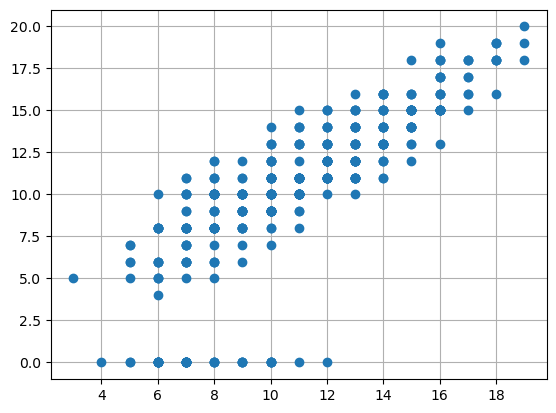

In [41]:
plt.plot(student_data['G1'], student_data['G3'], 'o')
plt.grid(True)

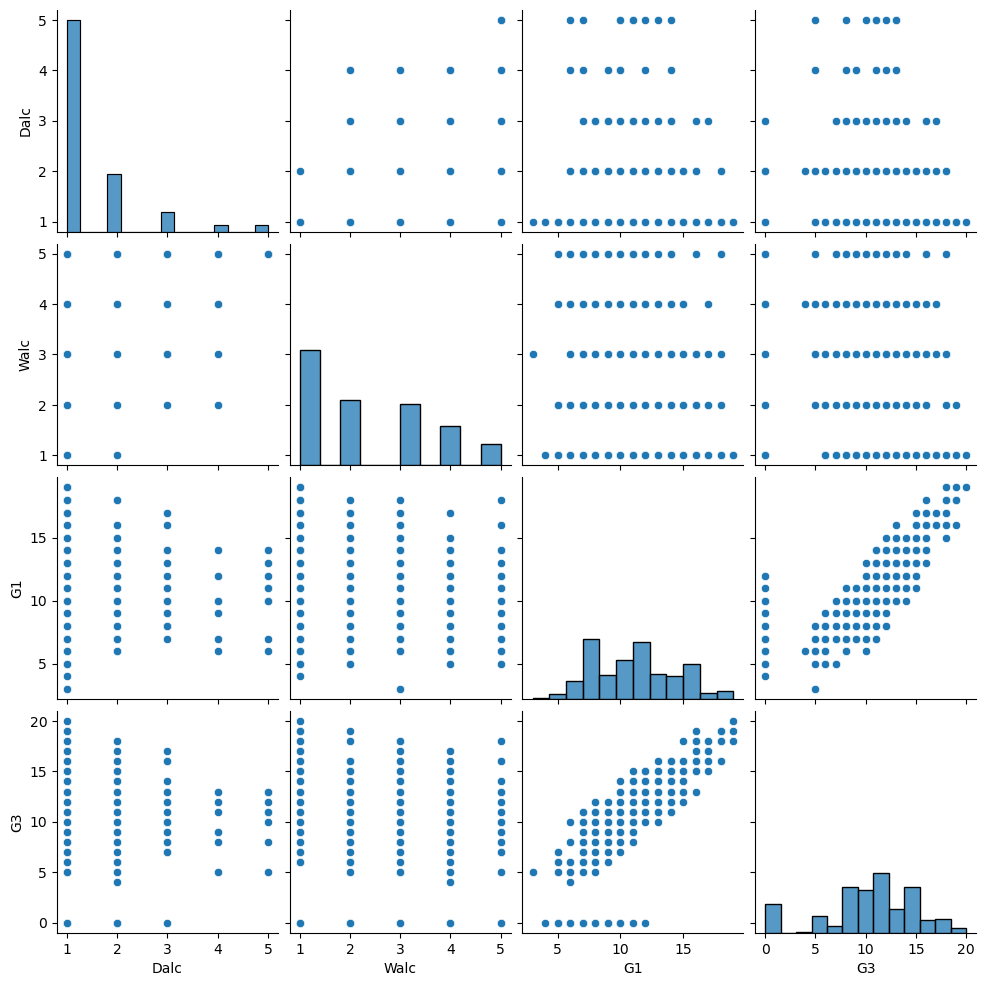

In [42]:
sns.pairplot(student_data[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

# Finalized Code

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

 <Basic information for data>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 ent

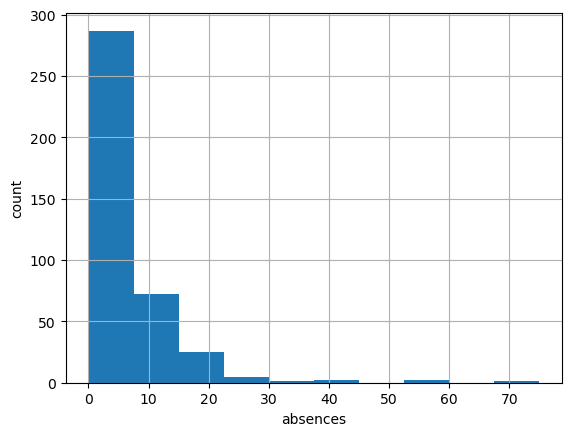

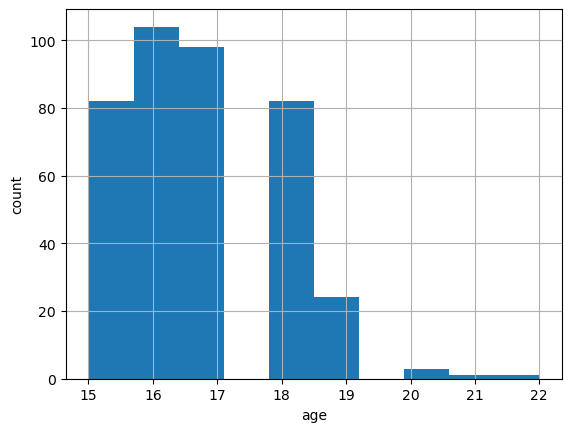


 <Technical Statistics Summary Information>
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.2911

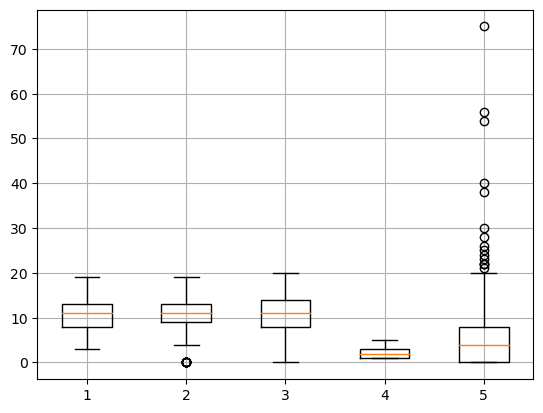


 <Coefficient of variation>
age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

 <Convariance>
                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.628285 -0.228619 -0.226949    0.062873  -0.004434  0.231221   
Medu       -0.228619  1.198445  0.742717   -0.131061   0.059667 -0.192681   
Fedu       -0.226949  0.742717  1.184180   -0.120073  -0.008379 -0.202641   
traveltime  0.062873 -0.131061 -0.120073    0.486513  -0.059070  0.047844   
studytime  -0.004434  0.059667 -0.008379   -0.059070   0.704324 -0.108321   
failures    0.231221 -0.192681 -0.202641    0.047844  -0.108321  0.553017   
famrel      0.061717 -0.003842 -0

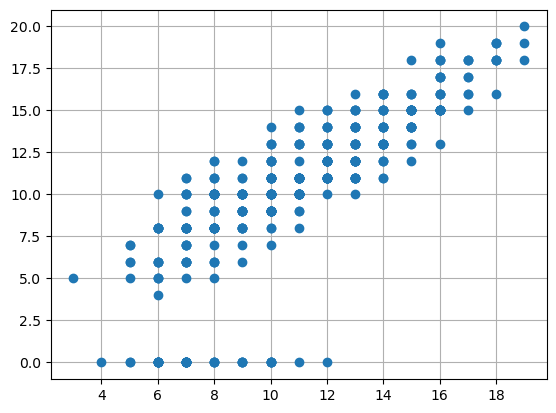

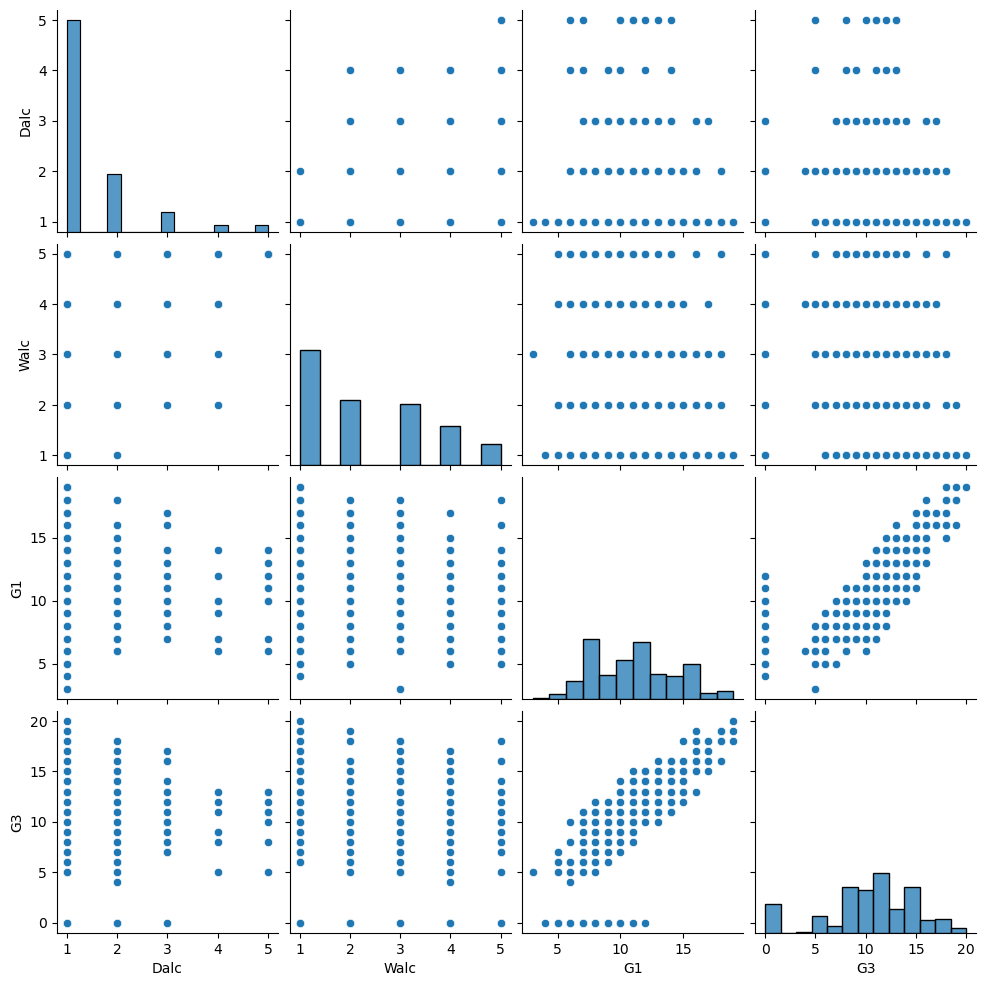

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

student_data = pd.read_csv('./data/student/student-mat.csv', sep = ';')
print(student_data.head())

print('\n <Basic information for data>')
print(student_data.info())

print('\n <Missing data>')
print(student_data.isnull().sum())
print('\n => Total of Missing data:', student_data.isnull().sum().sum())

plt.hist(student_data['absences'])
plt.xlabel('absences')
plt.ylabel('count')
plt.grid(True)
plt.show()

plt.hist(student_data['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.grid(True)
plt.show()

print('\n <Technical Statistics Summary Information>')
print(student_data.describe())
print("\n => The median of 'studytime':")
print(student_data['studytime'].mode())
print("\n => The variance of 'studytime':", student_data['studytime'].var())
print("\n => The standard deviation of 'studytime':", student_data['studytime'].std())

plt.boxplot([student_data['G1'], student_data['G2'], student_data['G3'], student_data['Walc'], student_data['absences']])
plt.grid(True)
plt.show()

print('\n <Coefficient of variation>')
cv = student_data.std(numeric_only = True) / student_data.mean(numeric_only = True)
print(cv)

print('\n <Convariance>')
print(student_data.cov(min_periods = None, ddof = 1, numeric_only = True))
print("\n => Covariance of grades in the first and third semesters:")
print(np.cov(student_data['G1'], student_data['G3']))
print("\n => Variance on first-semester grades:", student_data['G1'].var())
print("\n => Variance on third-semester grades:", student_data['G3'].var())

print('\n <Correlation coefficient>')
print(student_data.corr(numeric_only = True))

plt.plot(student_data['G1'], student_data['G3'], 'o')
plt.grid(True)
plt.show()

sns.pairplot(student_data[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)
plt.show()

In [2]:
import pandas as pd
a = pd.read_csv('./data/archive/universities_ranking.csv')
a

ranking                                           title        location  \
0           1                            University of Oxford  United Kingdom   
1           2                             Stanford University   United States   
2           3                              Harvard University   United States   
3           4              California Institute of Technology   United States   
4           5           Massachusetts Institute of Technology   United States   
...       ...                                             ...             ...   
1521     1522                              Yuan Ze University          Taiwan   
1522     1523  Yuriy Fedkovych Chernivtsi National University         Ukraine   
1523     1524                              Zagazig University           Egypt   
1524     1525                            University of Zagreb         Croatia   
1525     1526                            University of Žilina        Slovakia   

     number students  students staff ratio perc intl students gender ratio  
0             20,774                  11.1                41%      46 : 54  
1             16,223                   7.4                23%      44 : 56  
2             21,261                   9.3                25%      49 : 51  
3              2,238                   6.3                33%      36 : 64  
4             11,276                   8.4                34%      39 : 61  
...              ...                   ...                ...          ...  
1521           8,188                  19.7                 7%      42 : 58  
1522          12,616                  10.7                 0%      57 : 43  
1523         156,270                  24.4                 2%      54 : 46  
1524          59,336                  15.3                 3%      59 : 41  
1525           7,136                  11.7                 2%      34 : 66  

[1526 rows x 7 columns]

In [5]:
gender_df = a['gender ratio'].value_counts(dropna = False)
gender_df

58 : 42    74
NaN        73
53 : 47    73
55 : 45    70
57 : 43    69
           ..
1 : 99      1
21 : 79     1
79 : 21     1
83 : 17     1
11 : 89     1
Name: gender ratio, Length: 74, dtype: int64

In [3]:
a.isnull().sum()

ranking                  0
title                    0
location                 0
number students          0
students staff ratio     0
perc intl students       0
gender ratio            73
dtype: int64

In [7]:
most = gender_df.idxmax()
most

'58 : 42'

In [10]:
a.fillna(most, inplace = True)
a.isnull().sum()

ranking                 0
title                   0
location                0
number students         0
students staff ratio    0
perc intl students      0
gender ratio            0
dtype: int64